### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 


### Reading the dataset

In [2]:
df=pd.read_csv("diabetes.csv")


In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.shape

(768, 9)

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
newdf=df.iloc[:,:-1]


In [9]:
newdf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


## Checking for outliers

<AxesSubplot:>

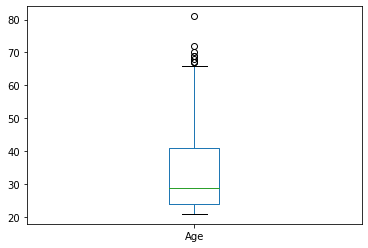

In [10]:
df.Age.plot.box()

<AxesSubplot:>

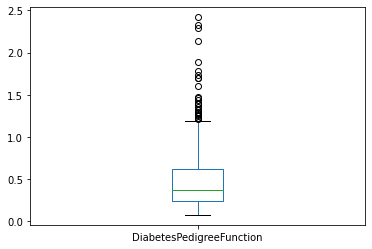

In [11]:
df.DiabetesPedigreeFunction.plot.box()

<AxesSubplot:>

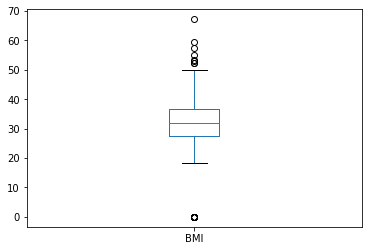

In [12]:
df.BMI.plot.box()

<AxesSubplot:>

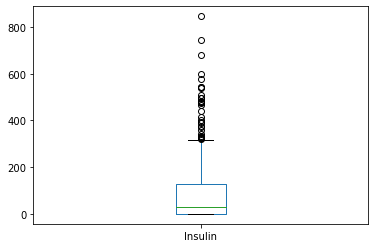

In [13]:
df.Insulin.plot.box()

<AxesSubplot:>

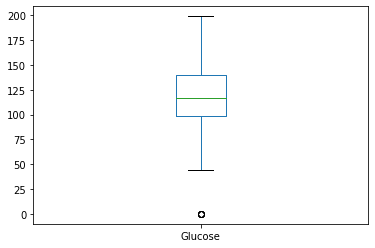

In [14]:
df.Glucose.plot.box()

<AxesSubplot:>

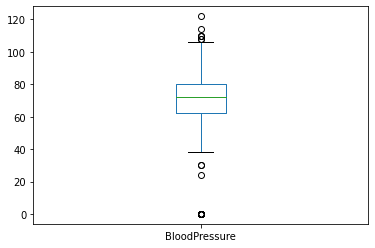

In [15]:
df.BloodPressure.plot.box()

### Looking at the count of class Outcome

<AxesSubplot:>

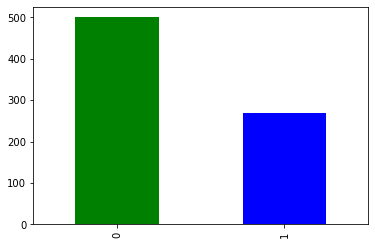

In [16]:
df['Outcome'].value_counts().plot.bar(stacked=True, color=['Green','Blue',])

<AxesSubplot:>

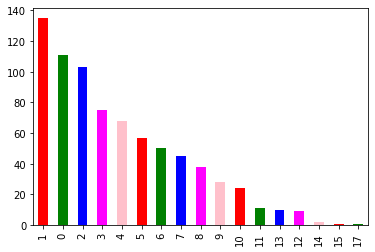

In [17]:
df["Pregnancies"].value_counts().plot.bar(stacked=True, color=['Red','Green','Blue','Magenta',"Pink"])

In [18]:
columns=df.columns
columns=list(columns)
columns.pop()

'Outcome'

### Visualizing the distribution using Distplot

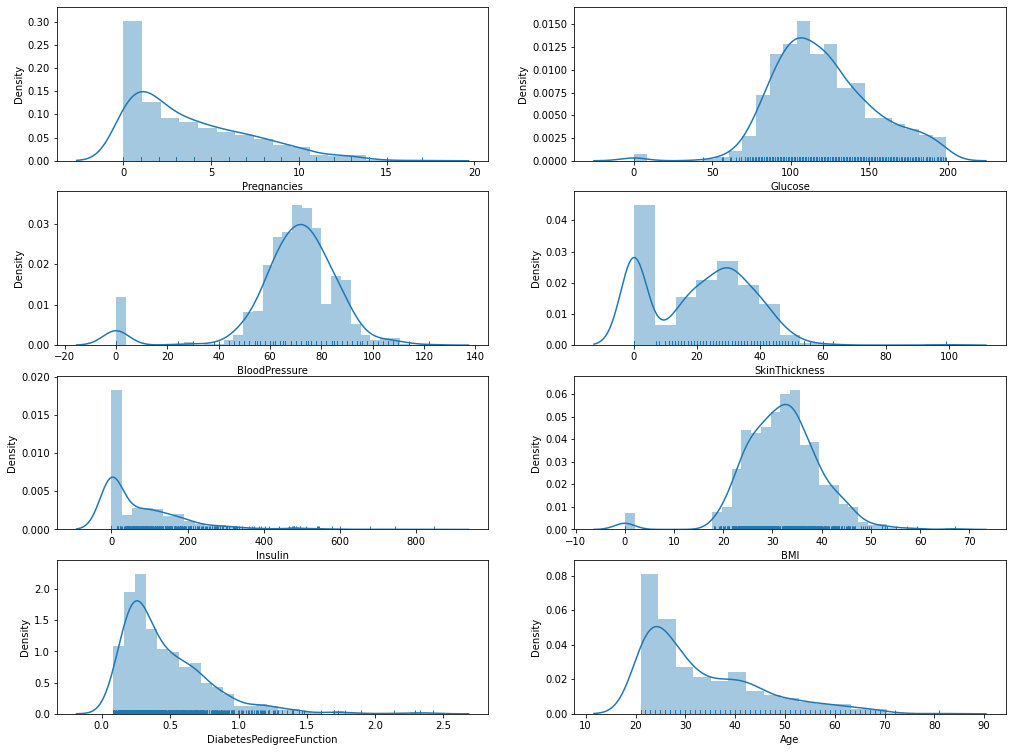

In [19]:
plt.figure(figsize=(17,13))
for i in range(len(columns)):
    plt.subplot(4,2,i+1)
    sns.distplot(df[columns[i]], hist=True, rug=True)
    
    

### knowing the range of the age

In [20]:
print(df['Age'].min())
print(df['Age'].max())

21
81


# Data Preprocessing

In [21]:
newdf.replace(0,np.nan,inplace=True)

In [22]:
newdf.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [23]:
col=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']

In [24]:
col1=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

## Handling Null values using statistics mean approach

In [27]:
for x in col1:
    newdf.fillna(df[x].mean(), inplace=True)

In [28]:
newdf.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

## Handling outliers using log approach

In [29]:
for i in col:
    newdf[i]=np.log(newdf[i])

### Rescaling the data to build machine learning model

In [30]:
col2=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [31]:
rs=StandardScaler()
newdf=rs.fit_transform(newdf)

In [32]:
newdf=pd.DataFrame(newdf,columns=col2)

In [33]:
newdf['Outcome']=df['Outcome']
newdf


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.373273,0.908563,-0.069468,-0.249627,-0.013461,0.143483,0.765848,1.425995,1
1,-0.495113,-1.313676,-0.490955,-0.498702,-0.013461,-0.741796,-0.135159,-0.190672,0
2,-0.324536,1.759187,-0.640015,1.392182,-0.013461,-1.243742,0.873492,-0.105584,1
3,-0.495113,-1.129404,-0.490955,-0.805723,-0.516712,-0.533911,-1.288739,-1.041549,0
4,2.426488,0.599081,-2.916735,-0.249627,0.644633,1.087051,2.776227,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,-0.275800,-0.622557,0.192436,0.168719,0.782619,0.063701,-1.251979,2.532136,0
764,-0.470745,0.134406,-0.205929,-0.593350,-0.013461,0.488218,-0.184608,-0.531023,0
765,-0.397641,0.101425,-0.069468,-0.805723,-0.166302,-0.799213,-0.693517,-0.275760,0
766,-0.495113,0.263682,-0.952642,1.392182,-0.013461,-0.273363,-0.144033,1.170732,1


### Spliting data into training and testing data

In [34]:
x=newdf.iloc[:,:-1]
y=newdf.iloc[:,-1:]


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y , random_state = 5)


### Building Logistic Regression Model

In [36]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print("F1 score is:",f1_score(y_test,predicted, average='binary'))

The accuracy of Logistic Regression is :  75.0 %
F1 score is: 0.6129032258064516


### Building KNN model

In [37]:
df_feat=newdf.iloc[:,:-1]

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
accuracy_rate = []

for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Outcome'],cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

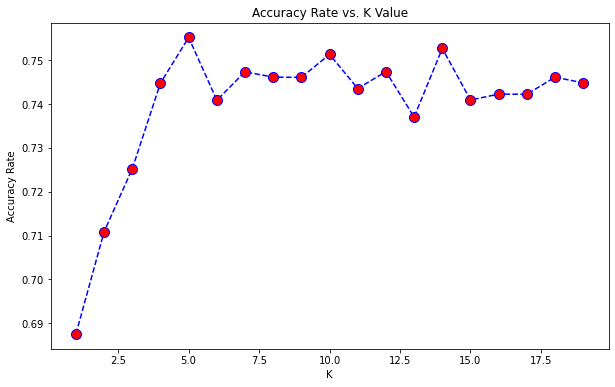

In [39]:
plt.figure(figsize=(10,6))

plt.plot(range(1,20),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [40]:
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('WITH K=16')
print ("The accuracy of KNN is : ", accuracy_score(y_test, pred)*100, "%")
print("F1 score is:",f1_score(y_test,pred, average='binary'))

WITH K=16
The accuracy of KNN is :  78.125 %
F1 score is: 0.6181818181818183


### Building Guassian Naive Bayes model

In [41]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
pred1=model.predict(x_test)
print ("The accuracy of GNB is : ", accuracy_score(y_test, pred1)*100, "%")
print("F1 score is:",f1_score(y_test,pred1, average='binary'))

The accuracy of GNB is :  73.4375 %
F1 score is: 0.6106870229007634


### Building Support Vector Classifier model

In [42]:
from sklearn import svm
sm= svm.SVC()
sm.fit(x_train, y_train)
pred2 = sm.predict(x_test)


In [43]:
print ("The accuracy of SVC is : ", accuracy_score(y_test, pred2)*100, "%")
print("F1 score is:",f1_score(y_test,pred2, average='binary'))

The accuracy of SVC is :  78.125 %
F1 score is: 0.6181818181818183


### Building RandomForestClassifier model

In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=28)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print ("The accuracy of RFC is : ", accuracy_score(y_test, predicted)*100, "%")
print("F1 score is:",f1_score(y_test,predicted, average='binary'))

The accuracy of RFC is :  80.20833333333334 %
F1 score is: 0.6935483870967741
